In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
star = cr.Star(name="WASP-74", mission="Kepler") #ignore mission here 

Could not resolve K2 None to a sky position.


mission=Kepler/K2 but no epicid given.
Target: WASP-74
Searching Vizier: (304.539 -1.07573) with radius=3.0 arcsec


In [3]:
gaia_params = star.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for ra,dec=(304.539 -1.07573) within 3.0 arcsec.


In [4]:
star.query_TGv8_catalog()

Gaia_source_id     4224062406762625152
Gaia_RA                        304.539
Gaia_Dec                        -1.076
Gaia_parallax                  6.67342
Gaia_e_parallax              0.0508421
                          ...         
Casagrande_Fe_H                    NaN
Casagrande_Teff                 -32768
Deacon_Fe_H                        NaN
Deacon_Teff                        NaN
Deacon_logg                        NaN
Length: 72, dtype: object

## stellar parameters from literature

In [ ]:
import numpy as np

cols = "Teff logg __Fe_H_ Rad Mass vsini".split()
params={}
for col in cols:
    pars = star.query_vizier_param(col)
    mean = np.nanmean(list(pars.values()))
    err = np.nanstd(list(pars.values()))
    
    params[col] = (mean,err)
    print(f"{col}: {mean:.2f}, {err:.2f}")

## isochrones modeling

In [7]:
#include spectroscopic priors from paper
iso_params = star.get_iso_params(teff=(5888,67),
                                logg=(4.05,0.02),
                                feh=(0.38,0.03),
                                add_jhk=True
                               )

Querying TIC catalog for ra,dec=(304.539 -1.07573) within 3.0 arcsec.
Gaia and TIC catalog cross-match succeeded.


In [8]:
iso_model = star.init_isochrones(iso_params)

{'teff': [5888.0, 67.0], 'G': [9.5723, 0.01], 'BP': [9.928137, 0.01], 'RP': [9.085504, 0.01], 'parallax': [6.673416850948866, 0.11218251667767937], 'feh': [0.38, 0.03], 'logg': [4.05, 0.02], 'J': [8.548, 0.037], 'H': [8.286, 0.018], 'K': [8.221, 0.023]}


In [9]:
star.isochrones_model.observed_quantities

['G_mag',
 'BP_mag',
 'RP_mag',
 'J_mag',
 'H_mag',
 'K_mag',
 'parallax',
 'feh',
 'logg']

In [10]:
#limit upper limit up to 10 Msol
iso_model.set_bounds(mass=(0.1, 10))
iso_model._priors["mass"].bounds

(0.1, 10)

'age'


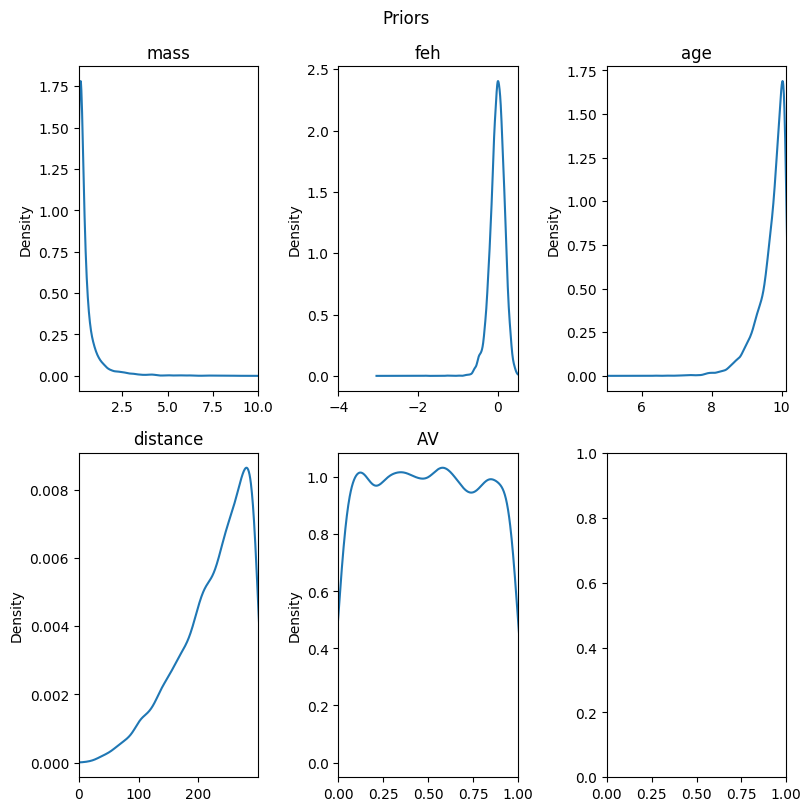

In [11]:
fig = star.plot_isochrones_priors()

In [12]:
iso_model = star.run_isochrones(overwrite=True)

Gaia and TIC catalog cross-match succeeded.
Using previously initialized model.
method: Nested Sampling
Done.


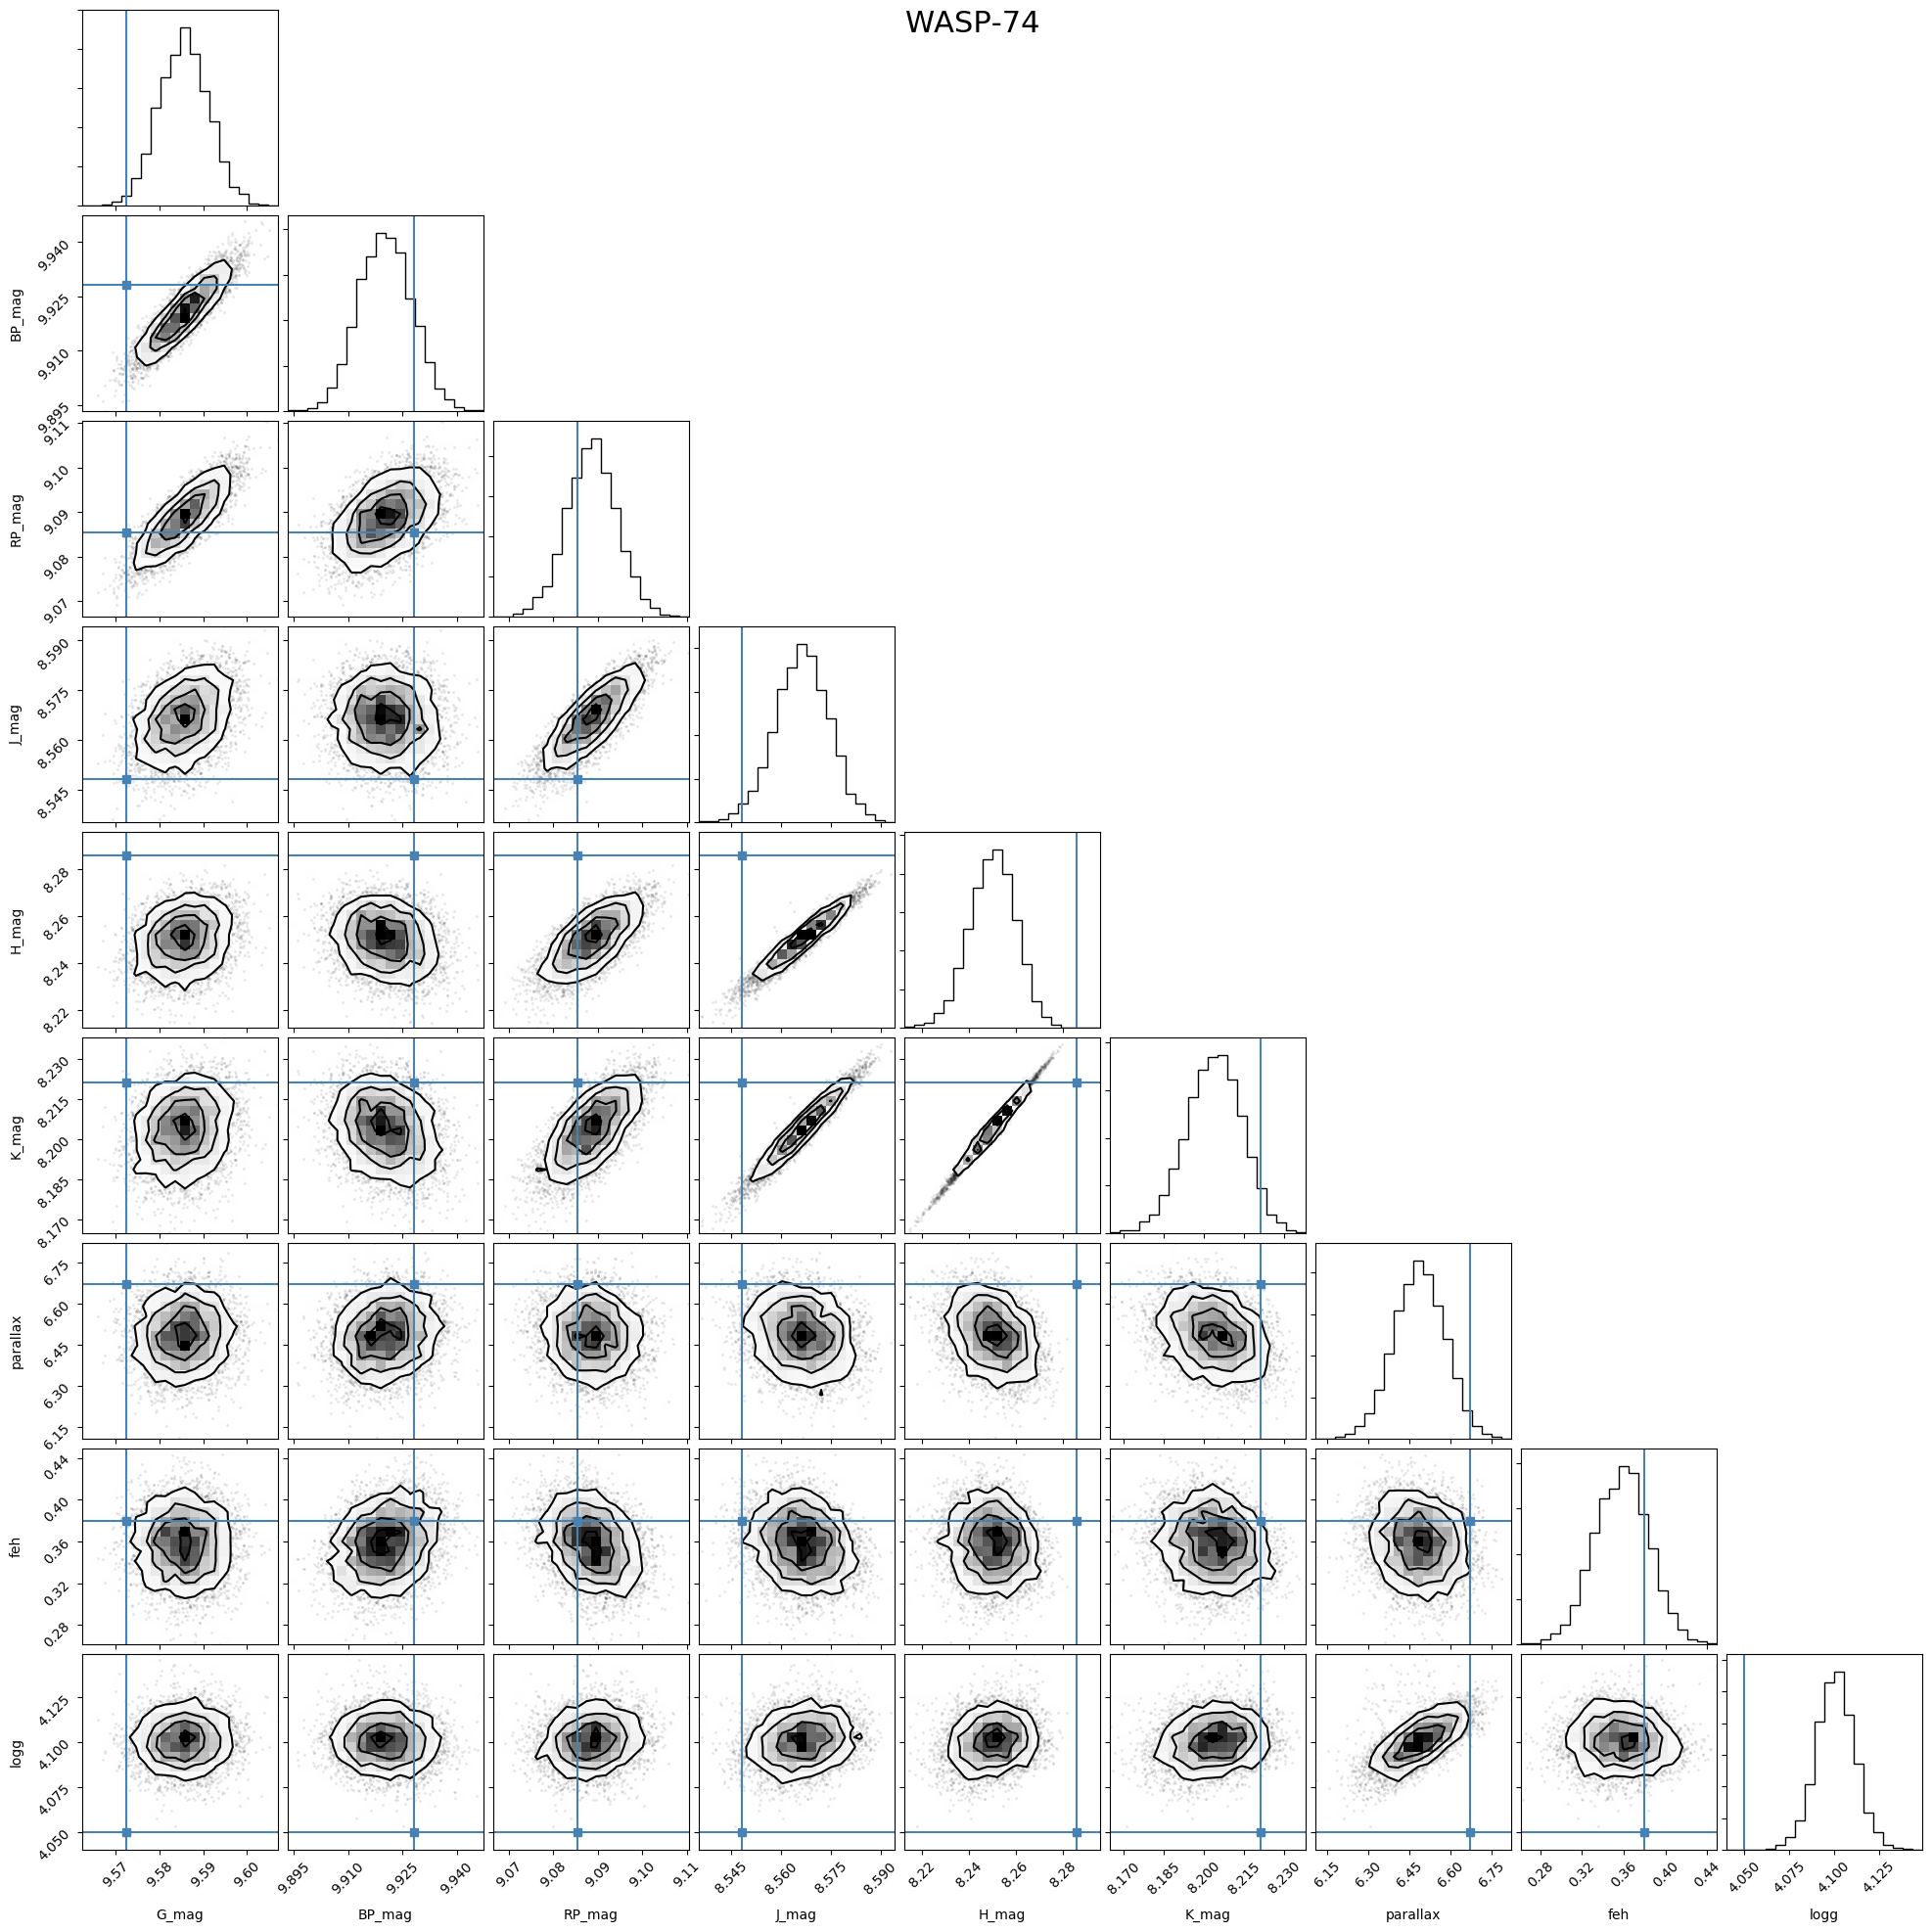

In [13]:
fig=star.plot_corner(posterior="observed")

In [56]:
iso_model.evidence

  analysing data from ./chains/WASP-74-mist-single-.txt


(-91.70260342982995, 0.0470982991568479)

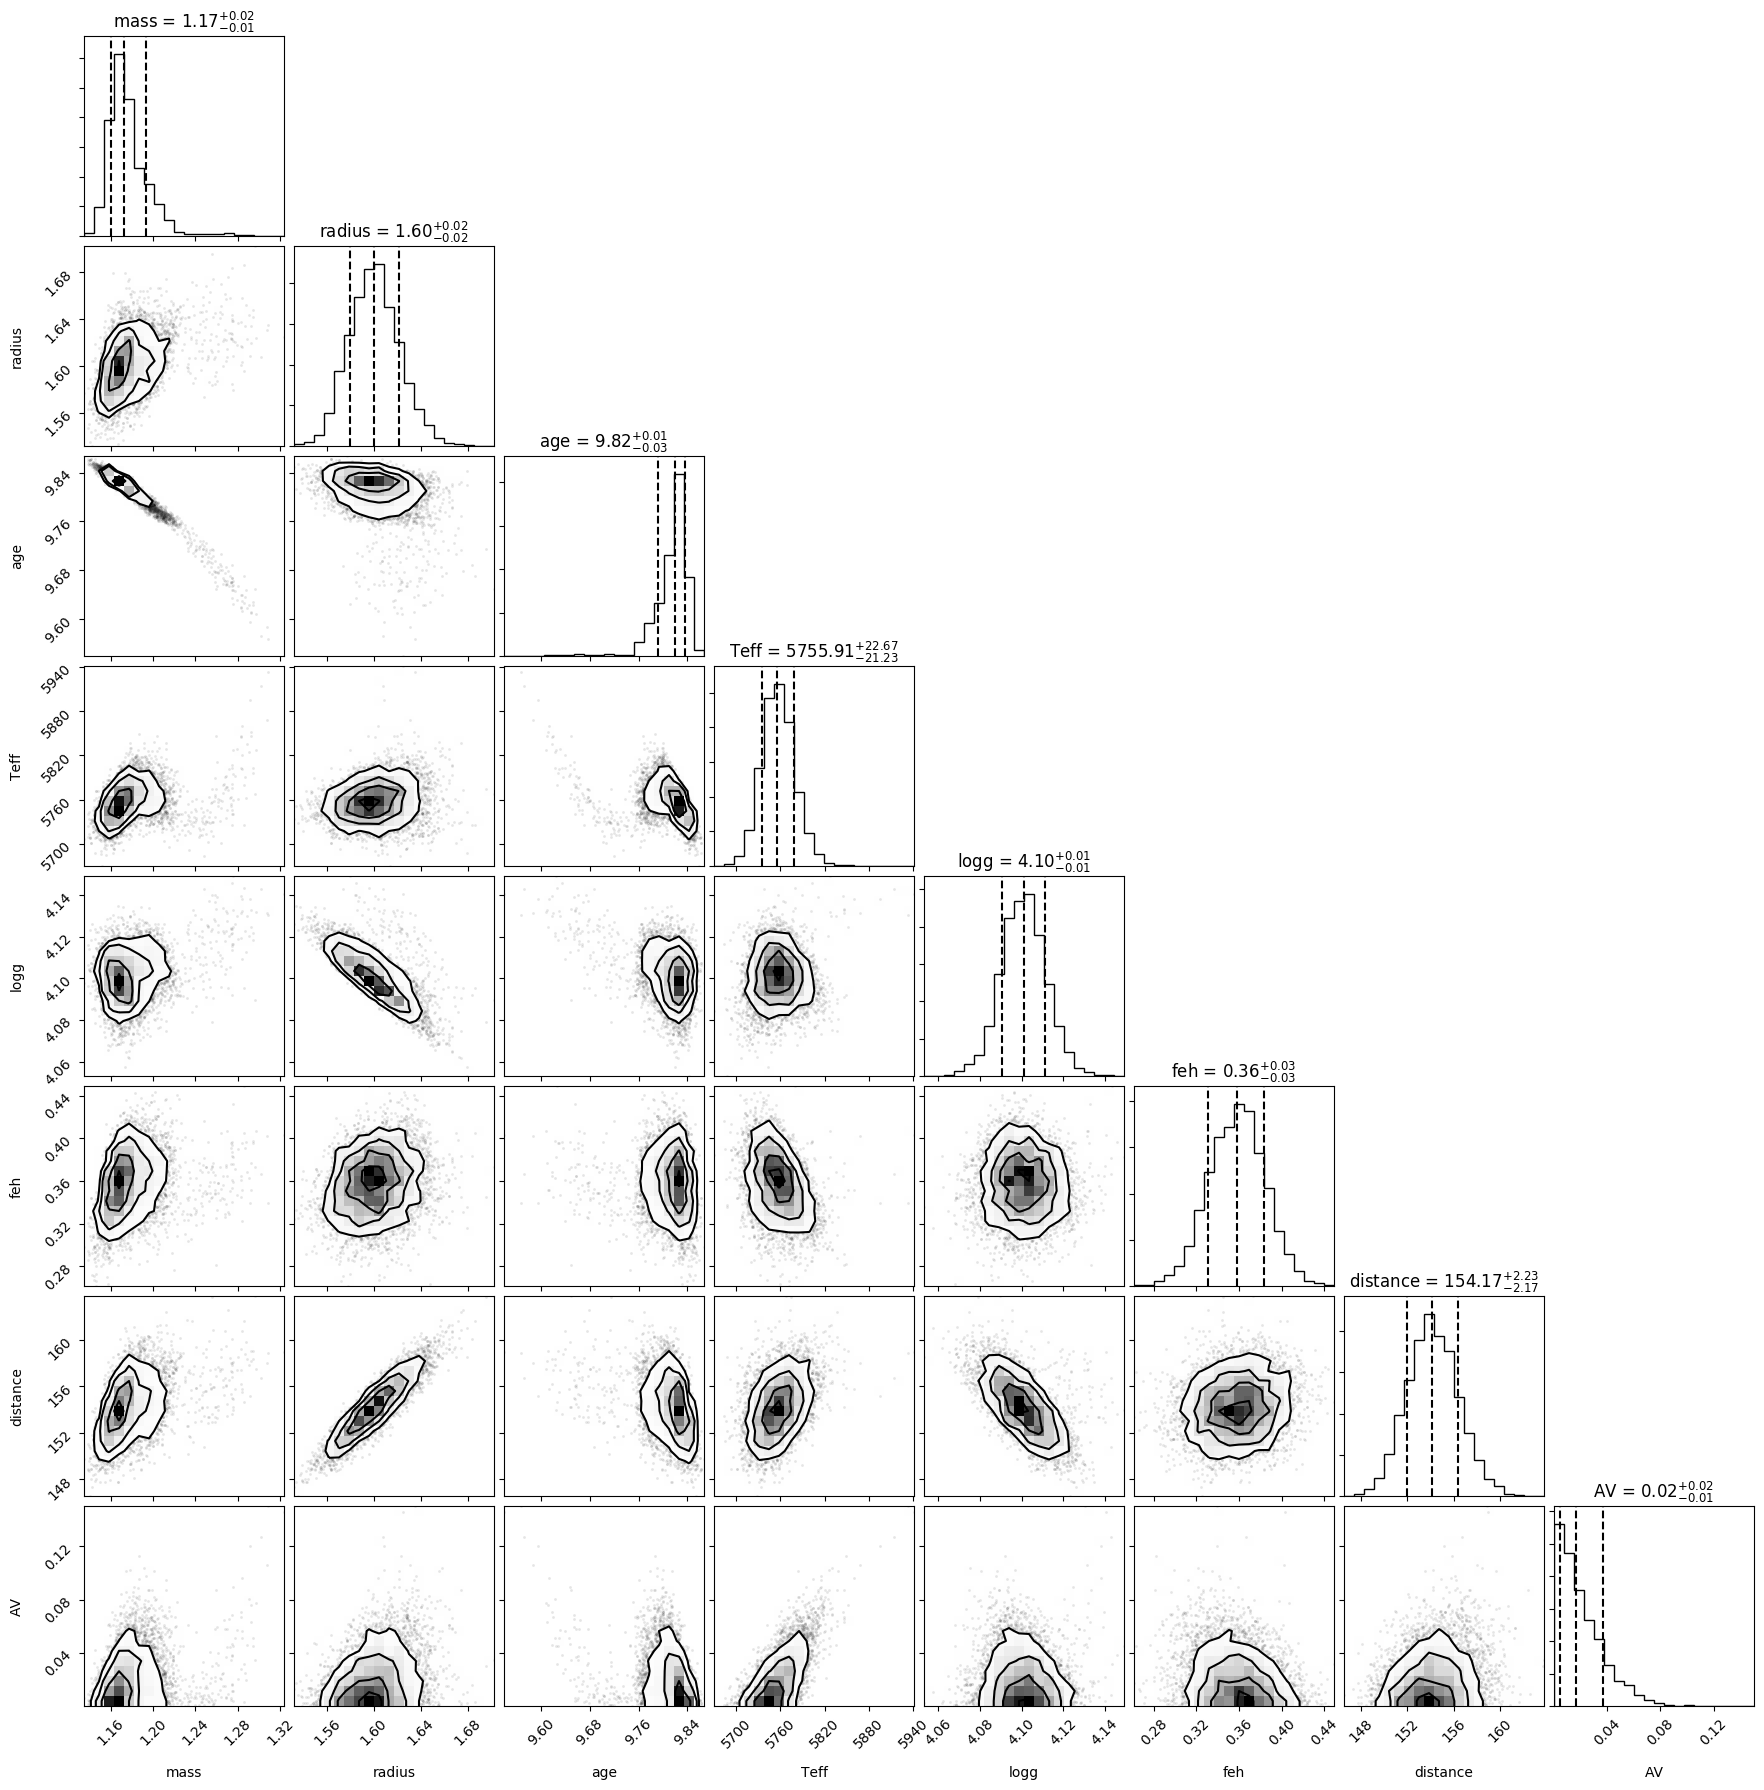

In [14]:
fig = star.plot_corner(posterior='physical')

In [55]:
emin = star.isochrones_model.derived_samples.eep.min()-100
emax = star.isochrones_model.derived_samples.eep.max()+100

idx = star.mist_eep_table["EEP Number"].between(emin,emax)
star.mist_eep_table.loc[idx, ["EEP Number", "Phase"]]

,EEP Number,Phase
2,353,intermediate age main sequence (IAMS )
3,454,terminal age main sequence (TAMS)


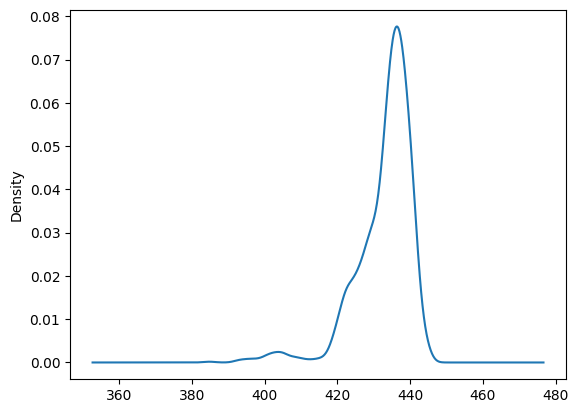

In [42]:
ax = star.isochrones_model.derived_samples.eep.plot(kind="kde")


## isochrones modeling (without jhk)

In [57]:
#include spectroscopic priors from paper
iso_params = star.get_iso_params(teff=(5888,67),
                                logg=(4.05,0.02),
                                feh=(0.38,0.03),
                                add_jhk=False
                               )

Gaia and TIC catalog cross-match succeeded.


In [58]:
iso_model = star.init_isochrones(iso_params)

{'teff': [5888.0, 67.0], 'G': [9.5723, 0.01], 'BP': [9.928137, 0.01], 'RP': [9.085504, 0.01], 'parallax': [6.673416850948866, 0.11218251667767937], 'feh': [0.38, 0.03], 'logg': [4.05, 0.02]}


In [60]:
#limit upper limit up to 10 Msol
iso_model.set_bounds(mass=(0.1, 10))
iso_model._priors["mass"].bounds

(0.1, 10)

In [61]:
iso_model2 = star.run_isochrones(overwrite=True)

Gaia and TIC catalog cross-match succeeded.
Using previously initialized model.
method: Nested Sampling
Done.


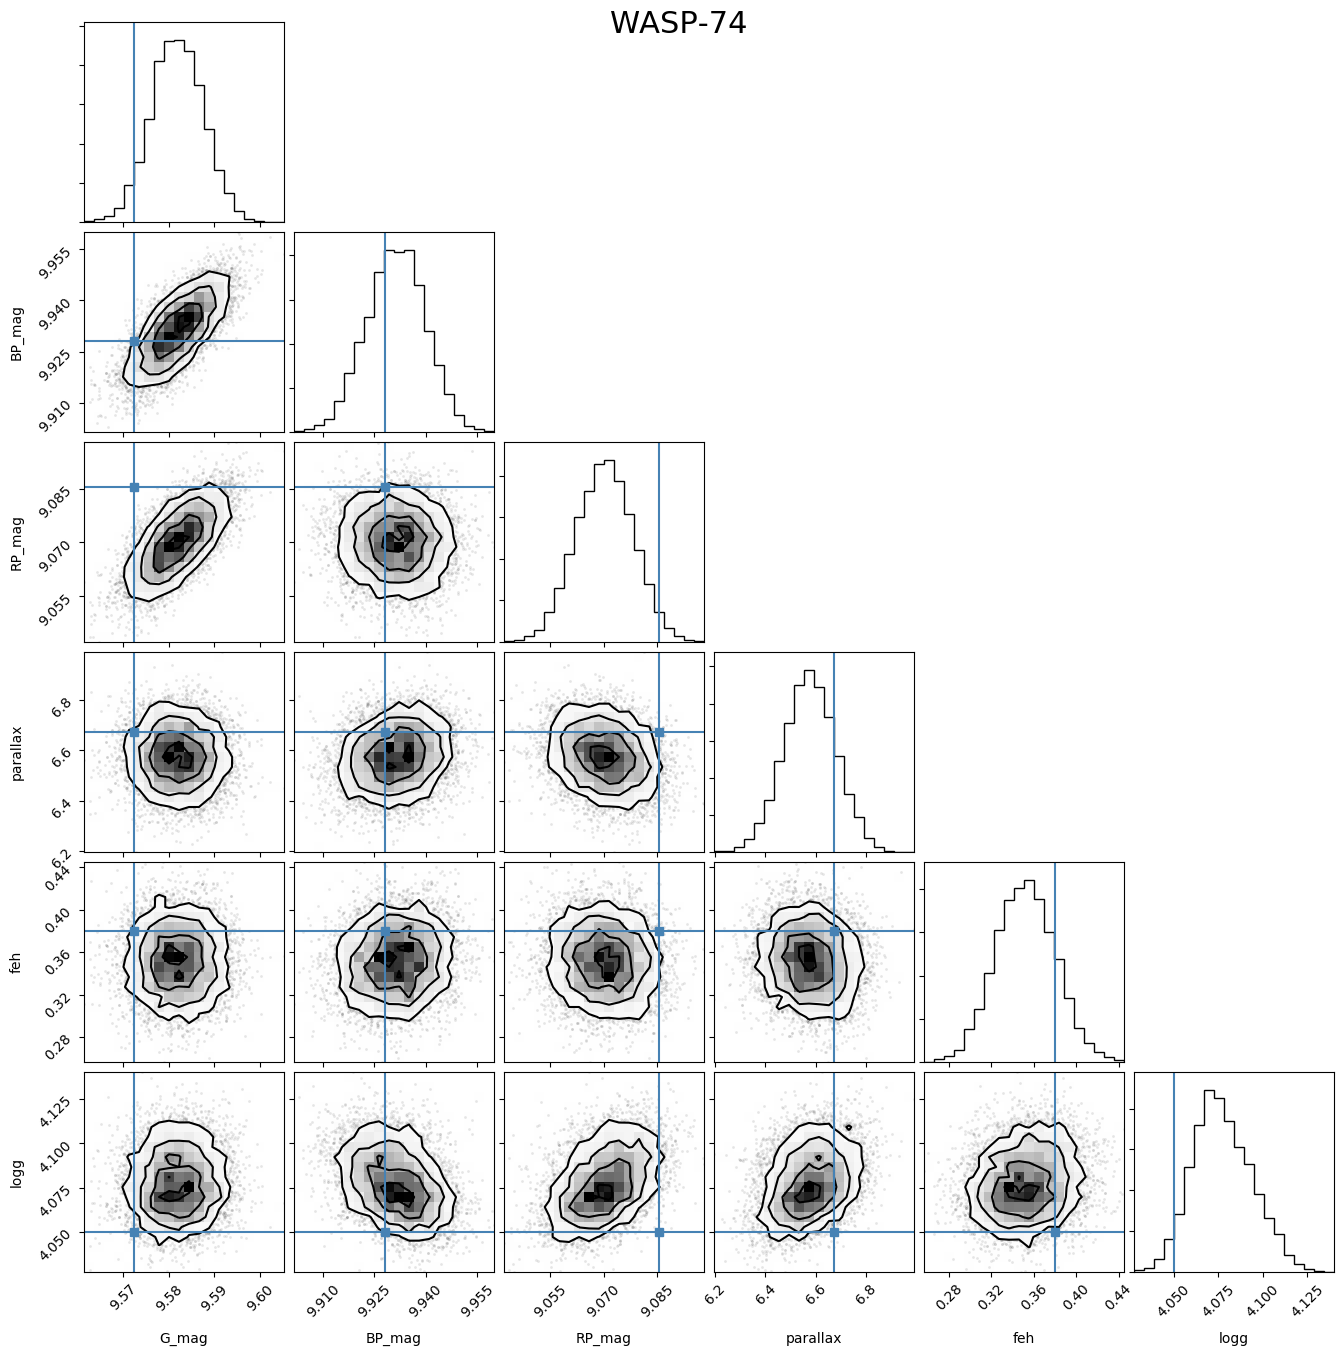

In [62]:
fig=star.plot_corner(posterior="observed")

In [73]:
iso_model.evidence, iso_model2.evidence

  analysing data from ./chains/WASP-74-mist-single-.txt
  analysing data from ./chains/WASP-74-mist-single-.txt


((-71.48497067694491, 0.037877735173064975),
 (-71.48497067694491, 0.037877735173064975))

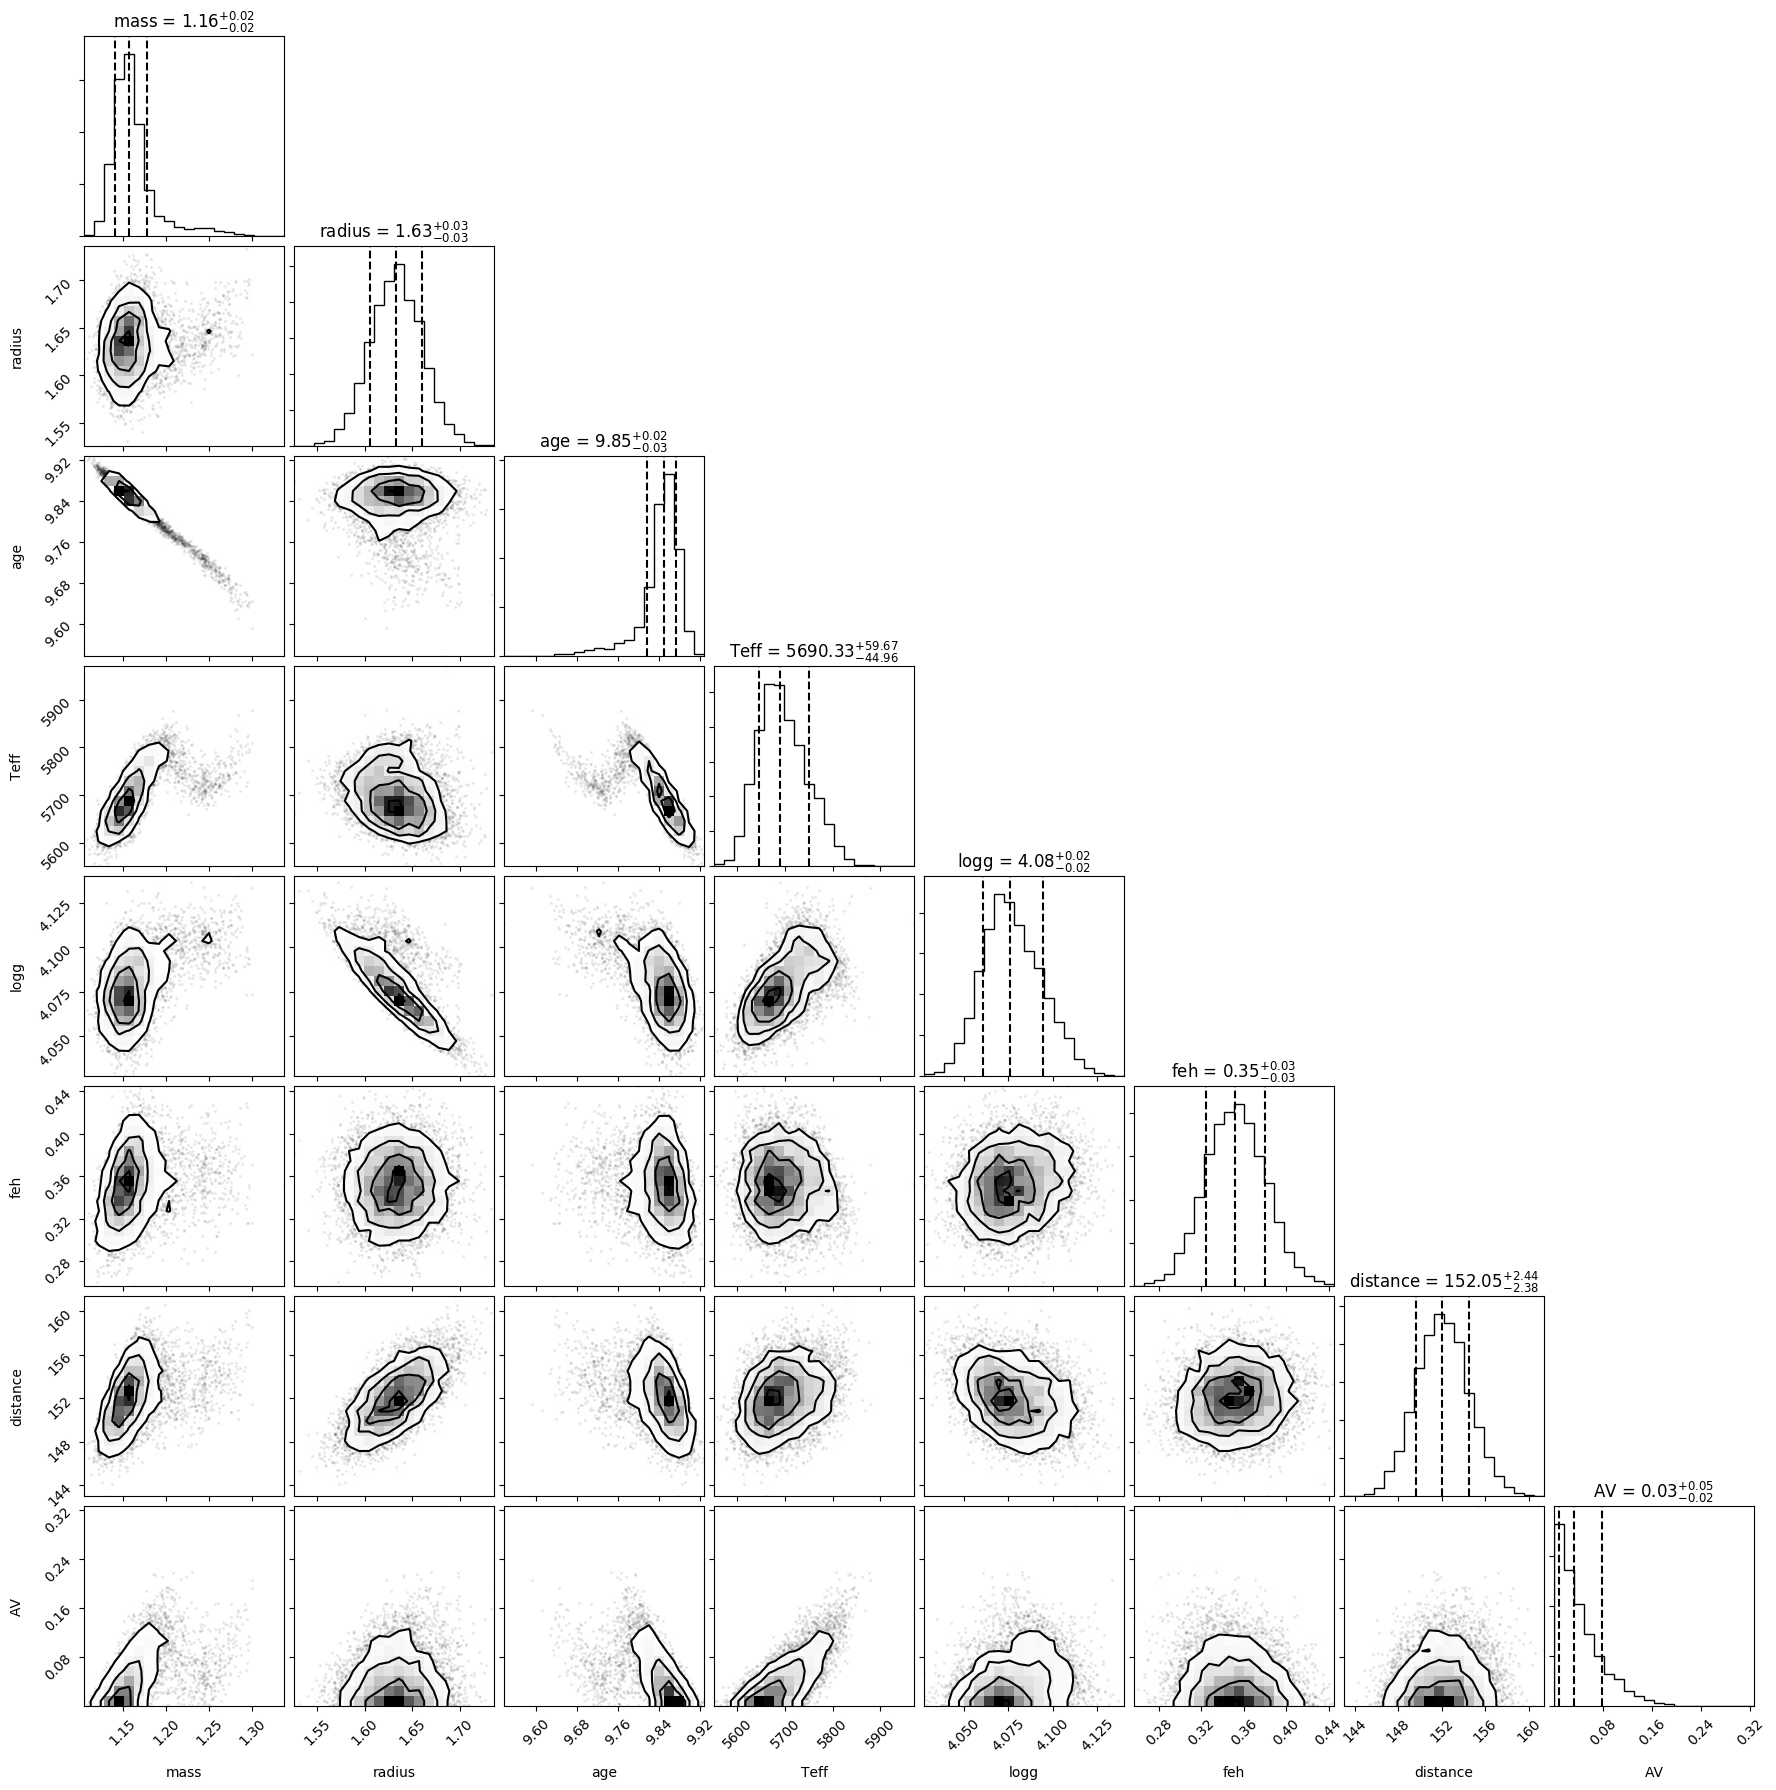

In [64]:
fig = star.plot_corner(posterior='physical')

In [65]:
ls

chains/              mirai/               tic92742876_s8_custom_lc_r1.png
chronos/             muscat_functions.py  tic92742876_s8_custom_lc_s1.png
craigslist/          muscatreader/        tic92742876_s8_custom_lc_s2.png
EB/                  paper-ci/            tic92742876_s8_custom_lc_tls.h5
epic9937/            pixel-ninja/         toi_others/
eth-bc/              planetlabs/          tql/
fastquant/           proposals/           transit_code/
fastquant-api/       rv_code/             video2nlp/
jpdeleon.github.io/  seidan/              vineyard/
kesprint_paper/      Sub-Saturns/         wasp-74.ipynb
kesprint_paper2/     template/


## MAST data

In [4]:
mast_table = star.query_mast()
mast_table.head()

Searching MAST for (304.539 -1.07573) with radius=3.0 arcsec
Available data: ['SPITZER_SHA/IRAC1', 'SPITZER_SHA/IRAC2', 'PS1/g', 'PS1/i', 'PS1/r', 'PS1/y', 'PS1/z', 'HST/F139M', 'HST/G141', 'HST/G430L', 'HST/MIRVIS', 'HST/G750L', 'HLA/F139M', 'HLA/G141', 'HLA/DETECTION'] in ['Infrared', 'OPTICAL', 'OPTICAL;INFRARED', 'Optical', 'INFRARED']


,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
0,science,SPITZER_SHA,SSC Pipeline,IRAC,NaN,IRAC1,Infrared,WASP-74,NaN,000003B4A700,...,"haracterization by Spitzer, Hubble, and JWST",62170880.0,POLYGON -55.46603900 -1.08221300 -55.46738000 ...,NaN,https://irsa.ipac.caltech.edu/data/SPITZER/SHA...,PUBLIC,False,NaN,19000023050,0.0
1,science,SPITZER_SHA,SSC Pipeline,IRAC,NaN,IRAC1,Infrared,WASP-74,NaN,000003B4A700,...,"haracterization by Spitzer, Hubble, and JWST",62170880.0,POLYGON -55.46604700 -1.08221800 -55.46738900 ...,NaN,https://irsa.ipac.caltech.edu/data/SPITZER/SHA...,PUBLIC,False,NaN,19000023050,0.0
2,science,SPITZER_SHA,SSC Pipeline,IRAC,NaN,IRAC1,Infrared,WASP-74,NaN,000003B4A700,...,"haracterization by Spitzer, Hubble, and JWST",62170880.0,POLYGON -55.46605300 -1.08221600 -55.46739500 ...,NaN,https://irsa.ipac.caltech.edu/data/SPITZER/SHA...,PUBLIC,False,NaN,19000023050,0.0
3,science,SPITZER_SHA,SSC Pipeline,IRAC,NaN,IRAC1,Infrared,WASP-74,NaN,000003B4A700,...,"haracterization by Spitzer, Hubble, and JWST",62170880.0,POLYGON -55.46603100 -1.08220700 -55.46737300 ...,NaN,https://irsa.ipac.caltech.edu/data/SPITZER/SHA...,PUBLIC,False,NaN,19000023050,0.0
4,science,SPITZER_SHA,SSC Pipeline,IRAC,NaN,IRAC1,Infrared,WASP-74,NaN,000003B4A700,...,"haracterization by Spitzer, Hubble, and JWST",62170880.0,POLYGON -55.46604000 -1.08221800 -55.46738200 ...,NaN,https://irsa.ipac.caltech.edu/data/SPITZER/SHA...,PUBLIC,False,NaN,19000023050,0.0


In [27]:
mast_table[mast_table.obs_collection=="SPITZER_SHA"].shape

(3748, 33)

## ESO spectra

In [5]:
eso_table = star.query_eso()
eso_table

Searching ESO: (304.539 -1.07573) with diameter=3.0 arcsec
Available data:
Instrument Nspectra  
UVES       42        

Found 42 ['UVES'] spectra with SNR>1



,COLLECTION,TARGETNAME,s_ra,s_dec,APERTURE,em_min,em_max,SPECRP,SNR,t_min,t_max,CREATORDID,access_url,dp_id
0,UVES,WASP-74,304.538367,-1.07566,0.684,4.726430e-07,6.835010e-07,56990.0,123.0,57962.120325,57962.122639,ivo://eso.org/origfile?UV_SFLX_1721923_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:19.988
1,UVES,WASP-74,304.538341,-1.07572,0.684,4.726430e-07,6.835010e-07,56990.0,125.7,57962.143421,57962.145736,ivo://eso.org/origfile?UV_SFLX_1721926_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:19.989
2,UVES,WASP-74,304.538337,-1.07573,0.684,4.726430e-07,6.835010e-07,56990.0,125.9,57962.146307,57962.148622,ivo://eso.org/origfile?UV_SFLX_1721926_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:19.990
3,UVES,WASP-74,304.538329,-1.07576,0.684,4.726430e-07,6.835010e-07,56990.0,126.0,57962.152077,57962.154392,ivo://eso.org/origfile?UV_SFLX_1721926_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:19.992
4,UVES,WASP-74,304.538457,-1.07645,0.684,4.726430e-07,6.835010e-07,56990.0,123.9,57962.213597,57962.215912,ivo://eso.org/origfile?UV_SFLX_1721926_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:19.996
5,UVES,WASP-74,304.538365,-1.07613,0.684,4.726430e-07,6.835010e-07,56990.0,124.8,57962.181856,57962.184171,ivo://eso.org/origfile?UV_SFLX_1721926_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:19.997
6,UVES,WASP-74,304.538371,-1.07565,0.684,4.726430e-07,6.835010e-07,56990.0,125.8,57962.105906,57962.108220,ivo://eso.org/origfile?UV_SFLX_1721923_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:19.998
7,UVES,WASP-74,304.538369,-1.07565,0.684,4.726430e-07,6.835010e-07,56990.0,122.0,57962.114561,57962.116876,ivo://eso.org/origfile?UV_SFLX_1721923_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:20.005
8,UVES,WASP-74,304.538344,-1.07571,0.684,4.726430e-07,6.835010e-07,56990.0,125.8,57962.140538,57962.142853,ivo://eso.org/origfile?UV_SFLX_1721926_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:20.007
9,UVES,WASP-74,304.538370,-1.07619,0.684,4.726430e-07,6.835010e-07,56990.0,125.6,57962.187625,57962.189940,ivo://eso.org/origfile?UV_SFLX_1721926_2017-07...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2017-11-09T16:02:20.010


## HARPS bank RVs

In [6]:
harps_bank_table = star.query_harps_bank_table()
harps_bank_table

Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

There are 1 matches: ['BD-013943']
                                                     8
G [mag]                                          9.572
Dist [pc]                                       149.85
Data products (ascii)  BD-013943_harps_all-data_v1.dat
Data products (csv)    BD-013943_harps_all-data_v1.csv




,Target,RA,DEC,Sp. Type,T_eff [K],B [mag],V [mag],G [mag],Dist [pc],Data products (ascii),Data products (csv)
8,BD-013943,20:18:09.3209,-01:04:32.610,F9,5604.0,10.39,9.75,9.572,149.85,BD-013943_harps_all-data_v1.dat,BD-013943_harps_all-data_v1.csv


Saved:  /home/jp/github/research/project/chronos/chronos/../data/BD-013943_harps_all-data_v1.csv
harps bank data validated.


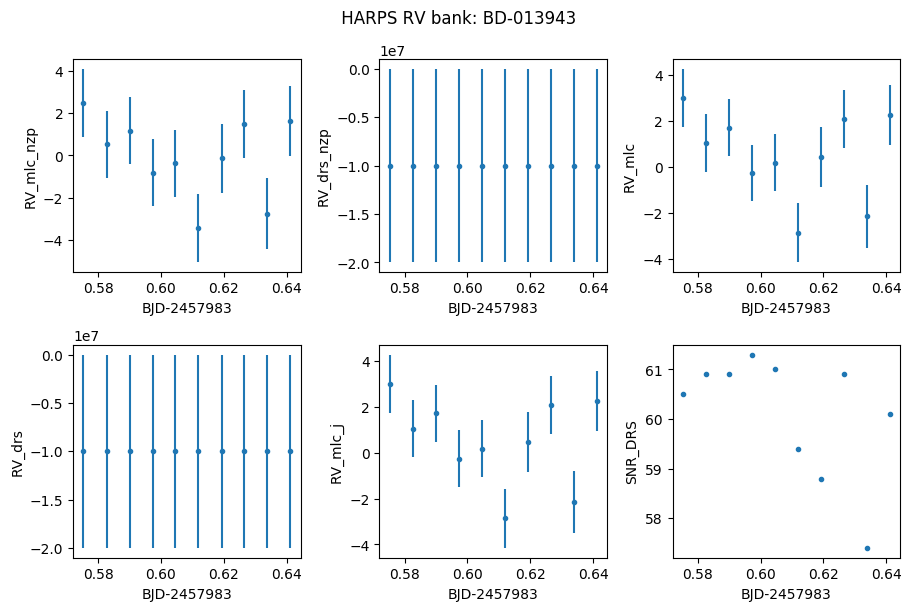

In [7]:
fig = star.plot_harps_rv_scatter()

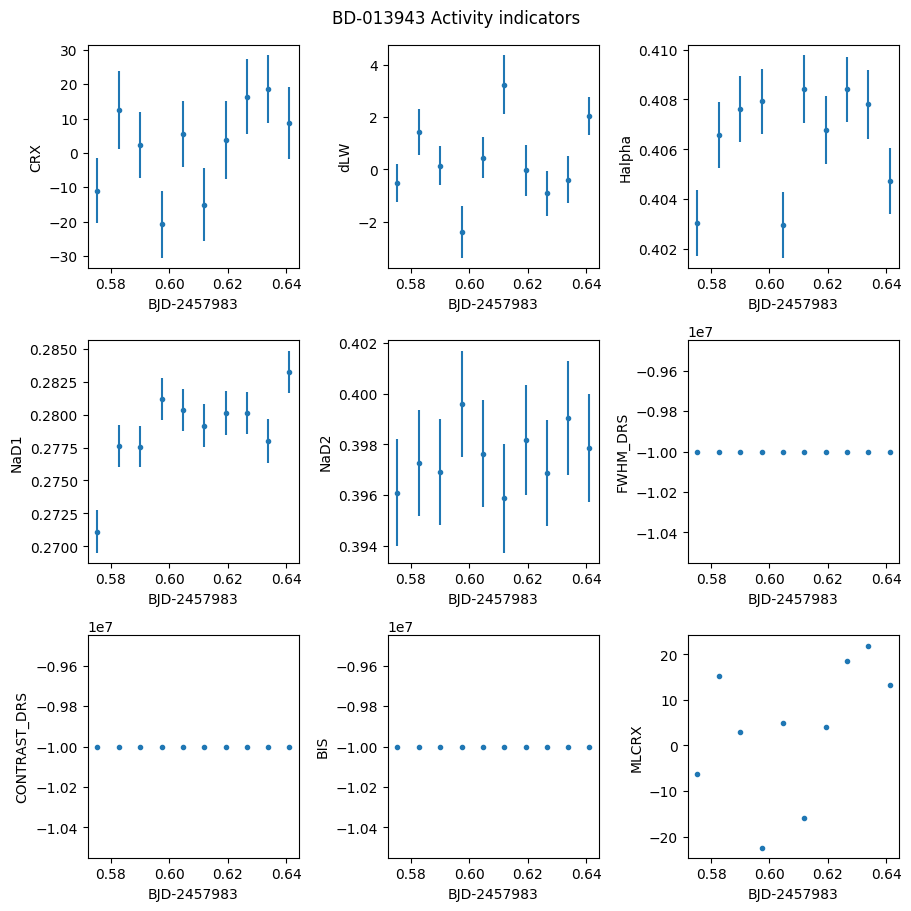

In [25]:
fig = star.plot_harps_rv_scatter(data_type="activity")

## cluster membership

In [9]:
star.get_cluster_membership() #not possible cluster member

Found 0 references with Assoc
ra: 16 matched
dec: 17 matched
parallax: 8 matched
pmra: 103 matched
pmdec: 0 matched
RV: 438 matched
matched 3 params in UPK_25:
['dec' 'pmra' 'RV']
Target not likely a cluster member
